In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#attributes normalisation
from scipy.stats import yeojohnson

#encoder
from sklearn import preprocessing

# Standardize the data
from sklearn.preprocessing import MinMaxScaler

#rebalancing target variable
from imblearn.over_sampling import RandomOverSampler

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_csv("./Hotel Reservations.csv")
print("shape of dataset :",df.shape)
df.head()

shape of dataset : (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [57]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [58]:
#check discrete variables 
print("Unique values of booking_status:", df.booking_status.unique())

Unique values of booking_status: ['Not_Canceled' 'Canceled']


In [59]:
df.duplicated().sum()

0

### Cleaning dataset

In [60]:
df = df.drop(labels=['Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date', 'type_of_meal_plan', 
                                'room_type_reserved', 'market_segment_type'], axis=1)

In [61]:
#check for missing values
print("Missing values in the dataset:\n\n", df.isna().sum())

Missing values in the dataset:

 no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   repeated_guest                        36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 9   avg_price_per_room                    36275 non-null  float64
 10  no_of_special_requests                36275 non-null  int64  
 11  booking_status 

In [63]:
df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,224,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,0,5,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,0,1,0,0,0,60.00,0,Canceled
3,2,0,0,2,0,211,0,0,0,100.00,0,Canceled
4,2,0,1,1,0,48,0,0,0,94.50,0,Canceled


### Plot dataset attributes

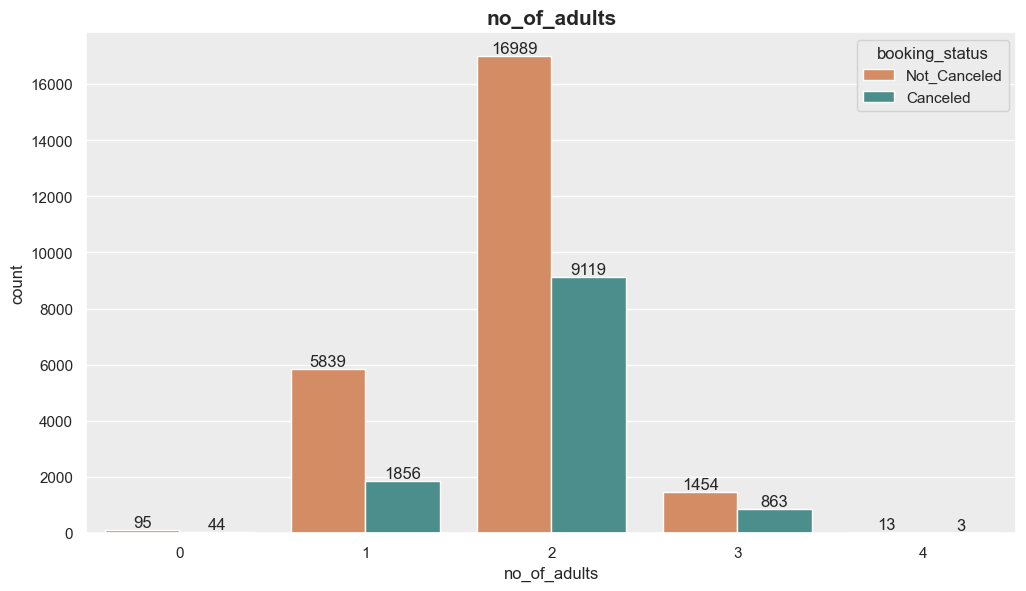

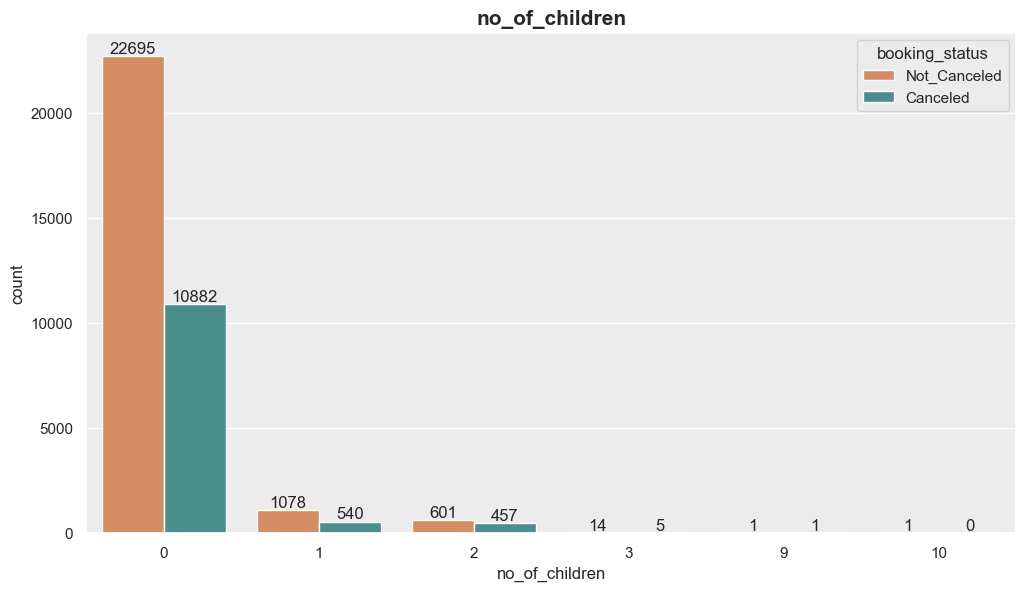

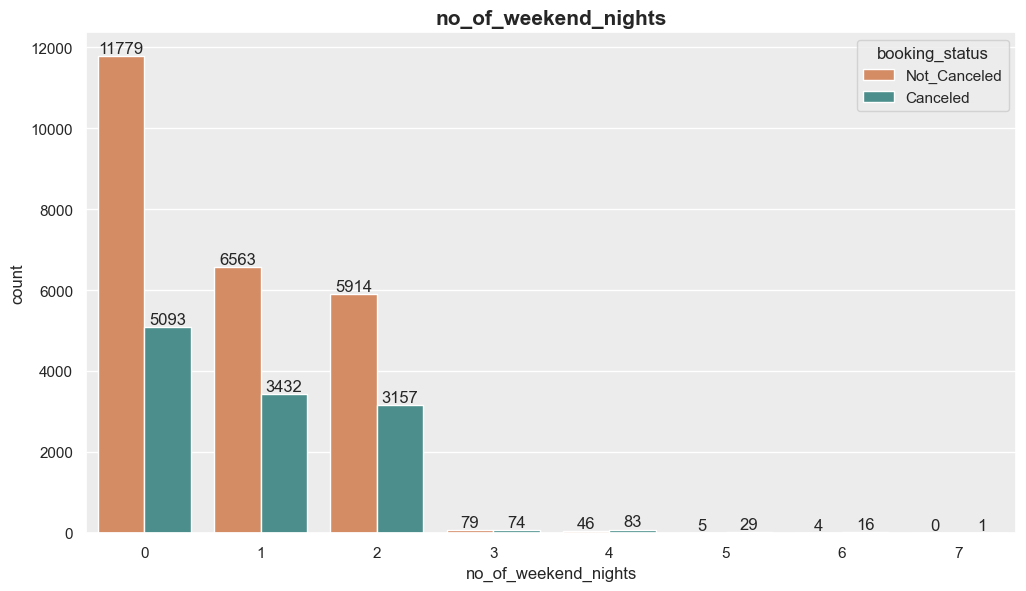

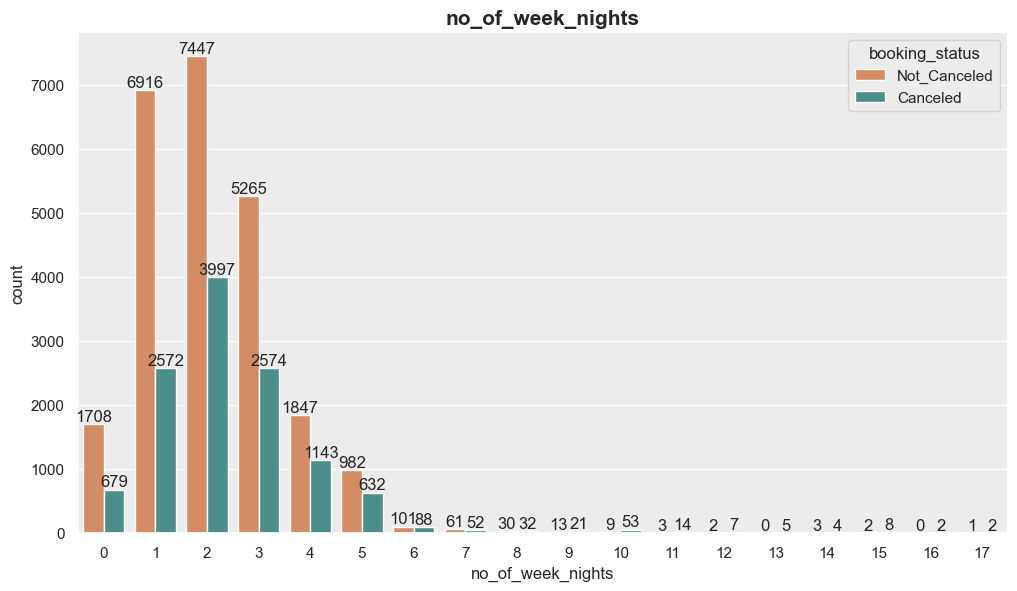

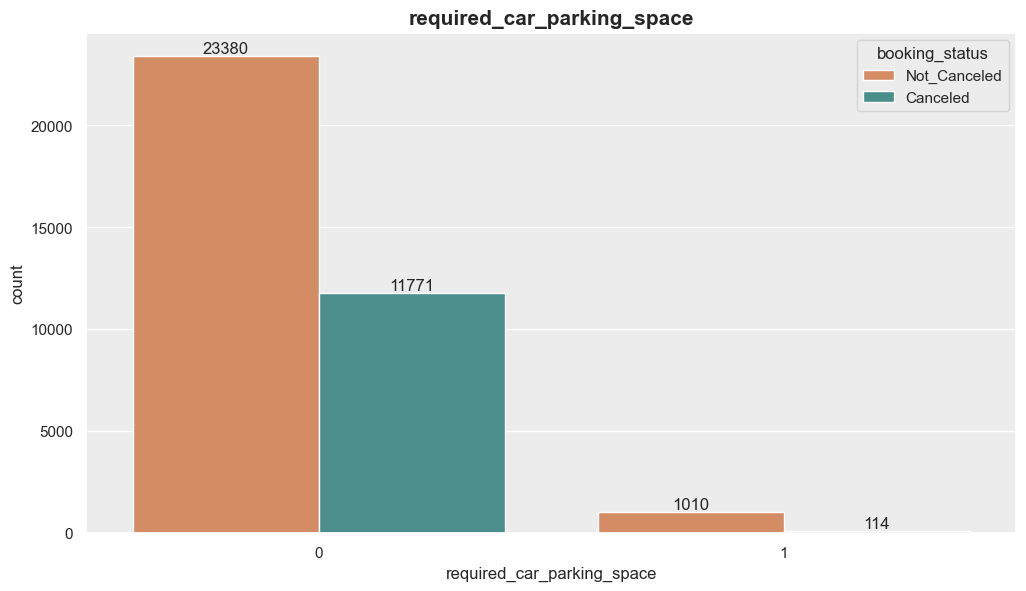

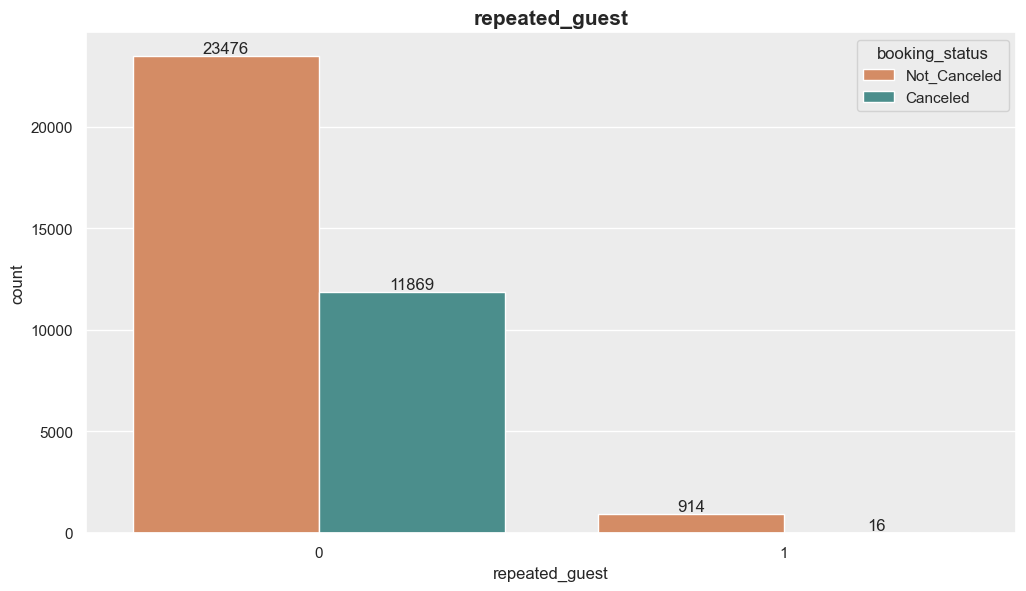

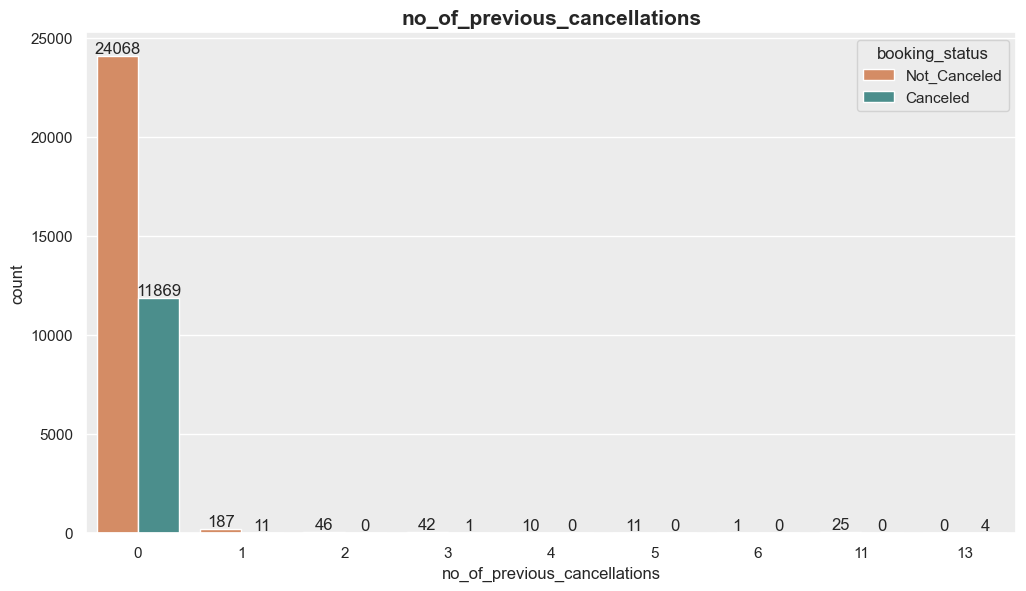

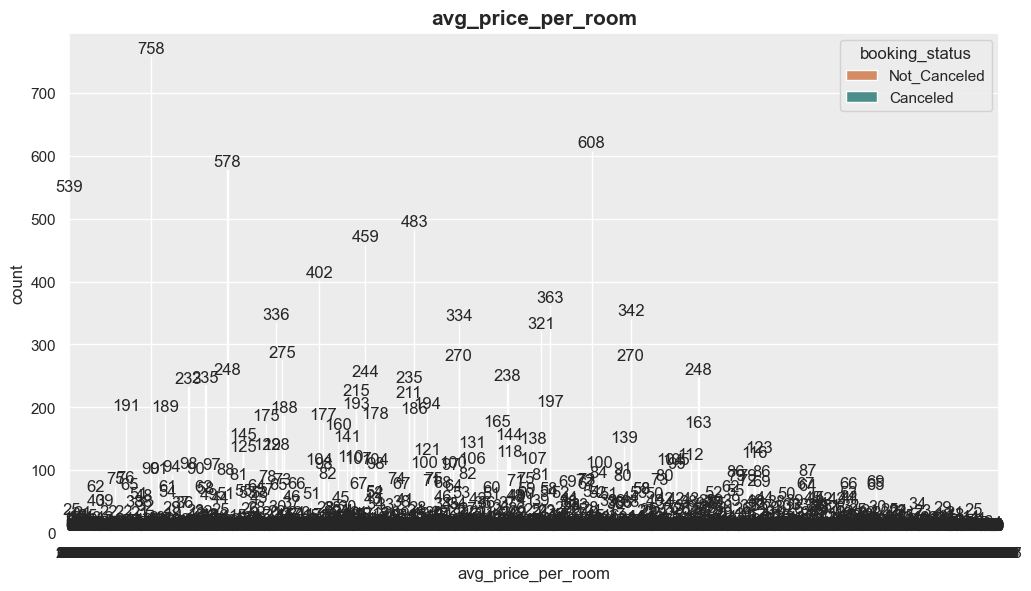

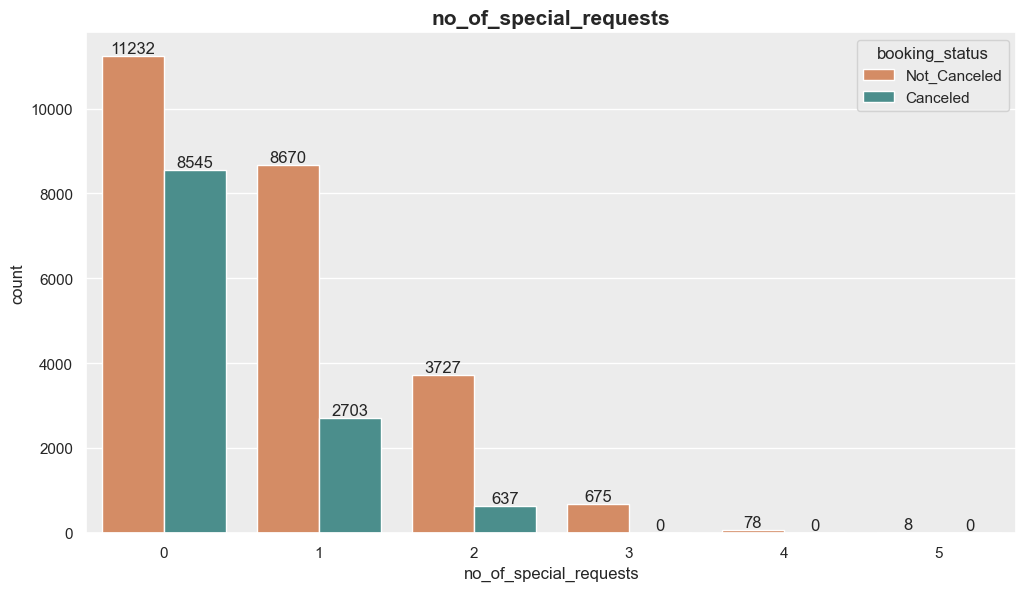

In [64]:
#create a list of categorical features and plot them
list_of_cat_features = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                                'no_of_week_nights', 'required_car_parking_space', 'repeated_guest',
                                'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests']]
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.countplot(data = df, x = list_of_cat_features[feature], hue = 'booking_status', palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

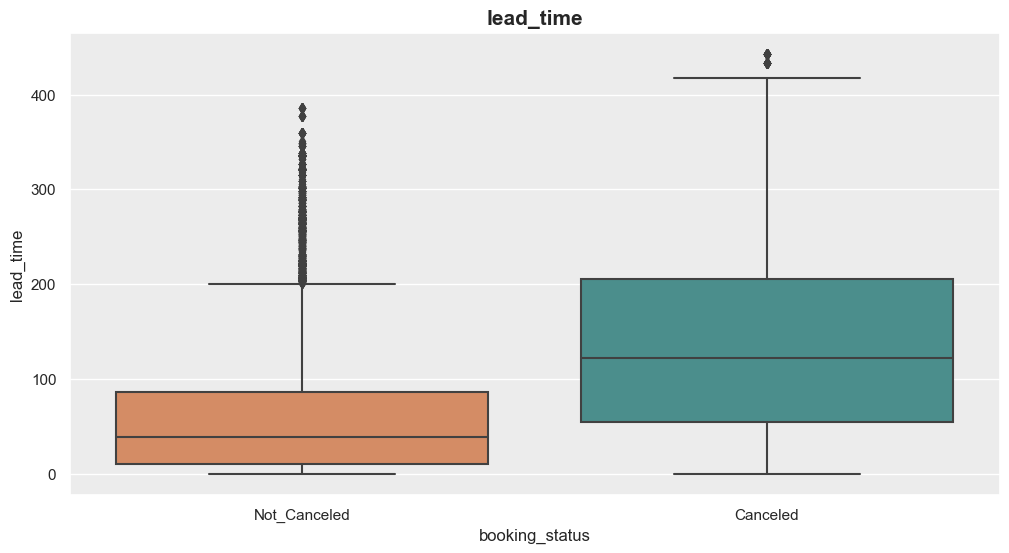

In [65]:
#create a list of numerical features and plot them
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("lead_time", fontsize=15, fontweight='bold', ha='center')
ax = sns.boxplot(x=df['booking_status'], y = df['lead_time'], data=df, palette=palette_features)

#add labels to each bar
for container in ax.containers:
    ax.bar_label(container)

#show the plot
plt.show()

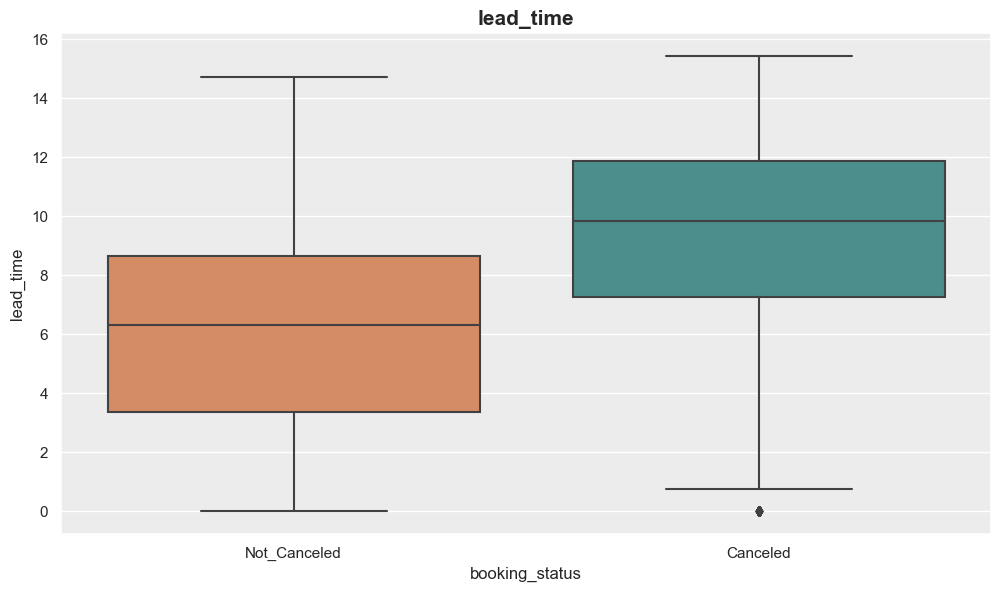

In [66]:
#normalization of lead_time attribute using boxcox function
df['lead_time'] = yeojohnson(df['lead_time'])[0]

sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6.5)) 
plt.title('lead_time', fontsize=15, fontweight='bold', ha='center')
ax = sns.boxplot(x=df['booking_status'], y = df['lead_time'], data = df, palette=palette_features)

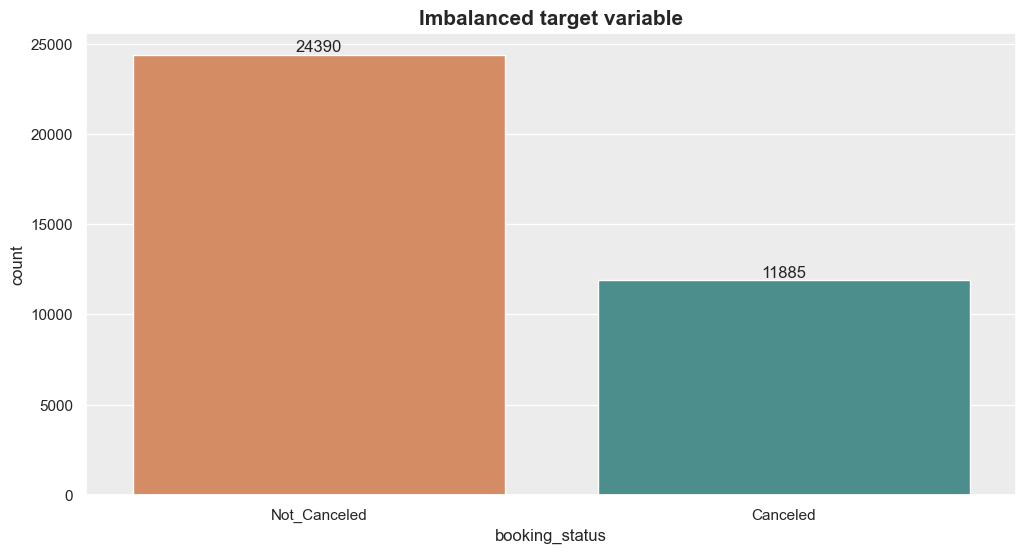

In [67]:
palette_features = ['#E68753', '#409996']
#plotting 'Exited' = target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=df['booking_status'], data=df, palette=palette_features)

#add labels to each bar
abs_values = df['booking_status'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()

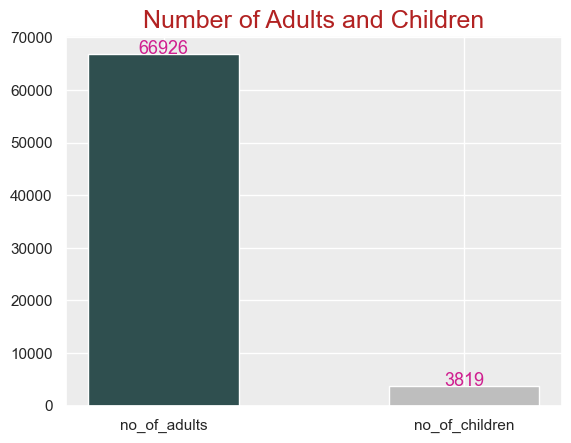

In [68]:
fig, ax = plt.subplots()
ax.bar(np.arange(2),[df.no_of_adults.sum(),df.no_of_children.sum()],width=0.5,color = ["#2f4f4f","#bebebe"])
plt.xticks(np.arange(2),("no_of_adults","no_of_children"))
plt.title("Number of Adults and Children",color="#b22222",fontsize=18)
for i, v in enumerate([df.no_of_adults.sum(),df.no_of_children.sum()]):
    ax.text(i, v + 0.5, str(v), ha='center',color="#d02090",fontsize=13)

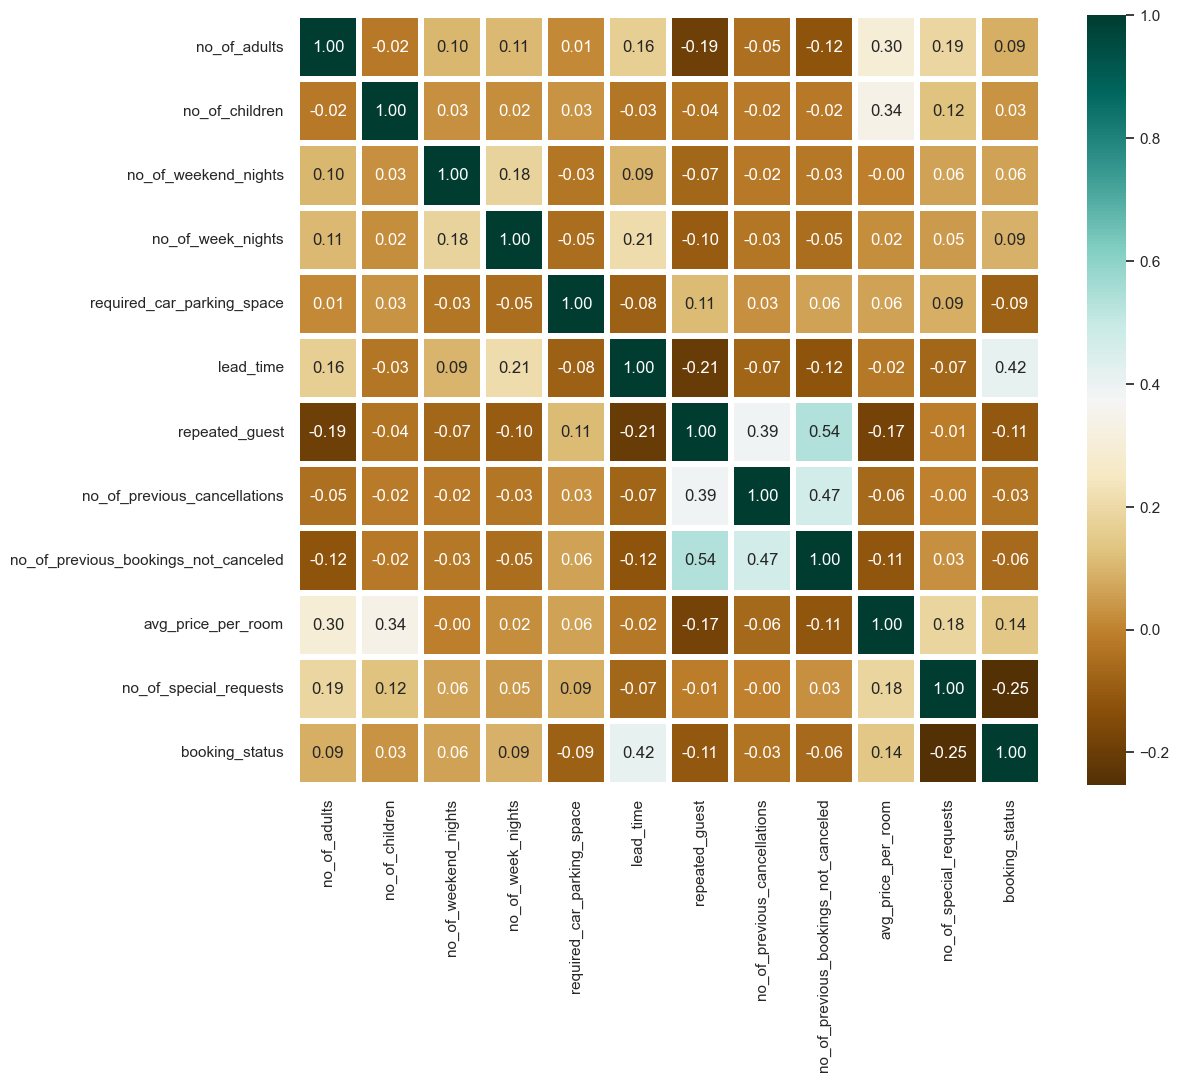

In [72]:
# plotting correlation matrix to notice relationships or lack of it between variables
corr = df.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [70]:
# Encode labels in column 'booking_status'.
df.loc[df['booking_status'] == 'Canceled', 'booking_status'] = pd.to_numeric(1)
df.loc[df['booking_status'] == 'Not_Canceled', 'booking_status'] = pd.to_numeric(0)
df['booking_status'] = pd.to_numeric(df['booking_status'])

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,12.231977,0,0,0,65.00,0,0
1,2,0,2,3,0,2.301688,0,0,0,106.68,1,0
2,1,0,2,1,0,0.761920,0,0,0,60.00,0,1
3,2,0,0,2,0,11.978824,0,0,0,100.00,0,1
4,2,0,1,1,0,6.869519,0,0,0,94.50,0,1


In [73]:
#balancing the target variable
columns = df.columns[:-1]
y = df['booking_status'] #prior target variable
X = df[columns]  #prior features

ros = RandomOverSampler(sampling_strategy='minority')
X_train_balanced, y_train_balanced = ros.fit_resample(X, y) #y_train as balanced target variable
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y_train_balanced)}\n")
print(X_train_balanced.shape[0] - df.shape[0], 'new random picked points')

Imbalanced target class: 0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

Balanced target class: Counter({0: 24390, 1: 24390})

12505 new random picked points


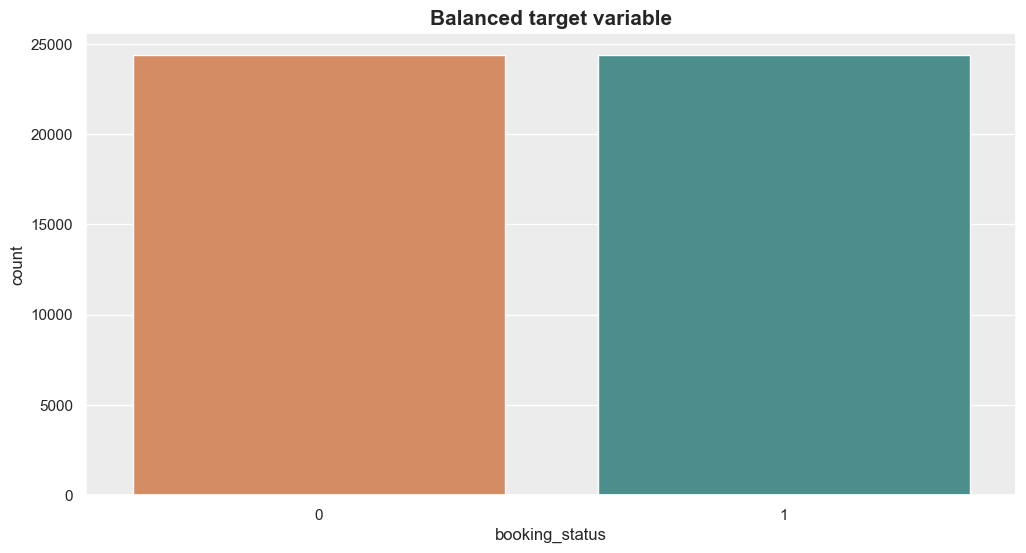

In [74]:
#plot the balanced target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y_train_balanced, data=df, palette=palette_features)
plt.show()

In [75]:
df[["no_of_weekend_nights","no_of_week_nights"]]

,no_of_weekend_nights,no_of_week_nights
0,1,2
1,2,3
2,2,1
3,0,2
4,1,1
...,...,...
36270,2,6
36271,1,3
36272,2,6
36273,0,3


In [76]:
df["cancellations_rate"] = df["no_of_previous_cancellations"] / (df["no_of_previous_cancellations"] + df["no_of_previous_bookings_not_canceled"]) *100
df.cancellations_rate.fillna(0,inplace=True)

In [77]:
df.drop(columns=["no_of_previous_cancellations","no_of_previous_bookings_not_canceled"],inplace=True)

In [78]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,cancellations_rate
0,2,0,1,2,0,12.231977,0,65.00,0,0,0.0
1,2,0,2,3,0,2.301688,0,106.68,1,0,0.0
2,1,0,2,1,0,0.761920,0,60.00,0,1,0.0
3,2,0,0,2,0,11.978824,0,100.00,0,1,0.0
4,2,0,1,1,0,6.869519,0,94.50,0,1,0.0


<Axes: >

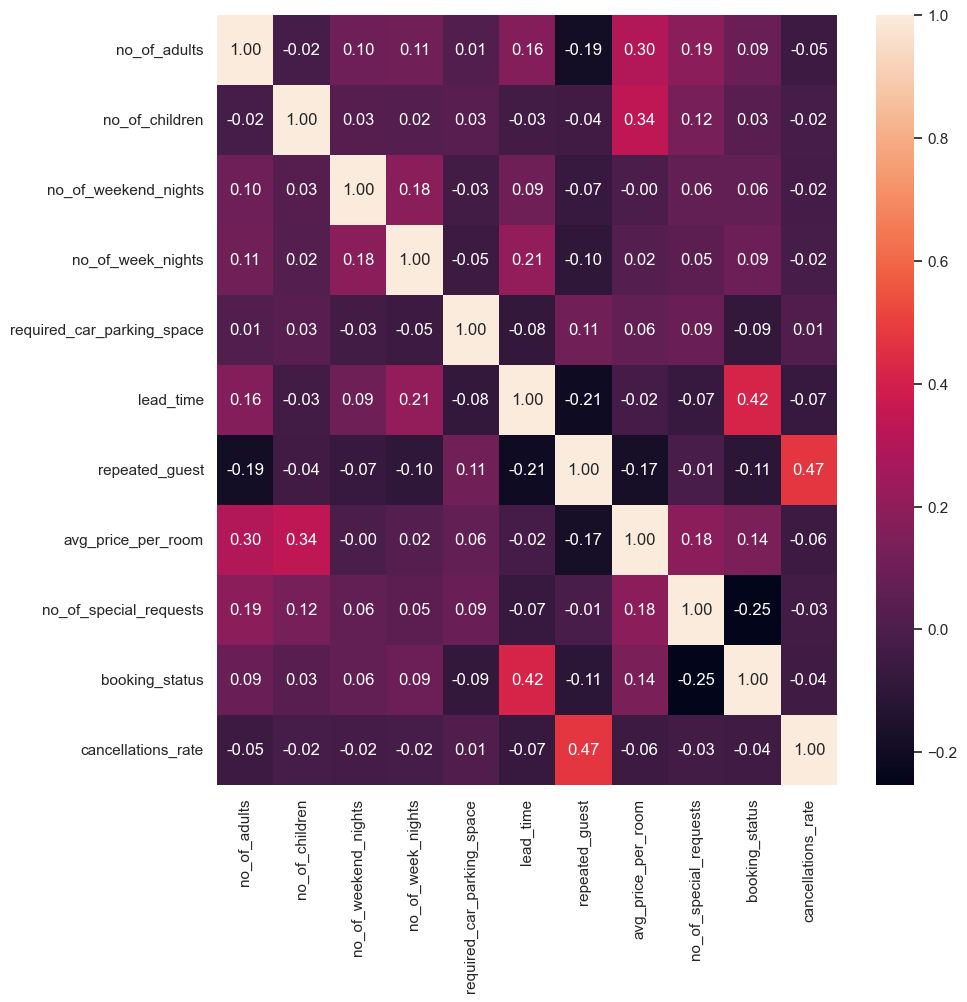

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

### Preparation and implementation of ML models

In [33]:
X = df.drop(columns="booking_status")
y = df.booking_status

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Train_x :",X_train.shape)
print("Test_x :",X_test.shape)
print("Train_y :",y_train.shape)
print("Test_y :",y_test.shape)

Train_x : (25392, 10)
Test_x : (10883, 10)
Train_y : (25392,)
Test_y : (10883,)


In [35]:
X_train.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_special_requests,cancellations_rate
29580,2,0,1,3,0,11.755593,0,90.95,0,0.0
6325,2,0,1,3,0,8.360953,0,90.95,1,0.0
33899,2,0,1,4,0,8.320175,0,99.45,1,0.0
720,2,0,2,0,0,7.560959,0,91.00,0,0.0
22120,2,1,0,4,0,11.776251,0,82.28,3,0.0
32168,2,2,0,2,0,3.692765,0,171.00,0,0.0
35540,2,0,0,1,0,2.995097,0,85.00,0,0.0
27457,1,0,1,1,0,13.545246,0,90.00,0,0.0
25636,1,0,1,2,0,7.657641,0,130.00,1,0.0
24030,2,0,1,2,0,7.360534,0,90.67,1,0.0


#### Default Random Forest

In [36]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rf = rf.predict(X_test)

print(y_pred_rf)

#evaluation
default_rf_accuracy = accuracy_score(y_test, y_pred_rf)
default_rf_precision = precision_score(y_test, y_pred_rf)
default_rf_recall = recall_score(y_test, y_pred_rf)
default_rf_f1 = f1_score(y_test, y_pred_rf)

[0 0 0 ... 0 1 1]


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7276
           1       0.84      0.75      0.79      3607

    accuracy                           0.87     10883
   macro avg       0.86      0.84      0.85     10883
weighted avg       0.87      0.87      0.87     10883

Accuracy Score : 0.87
Precision Score : 0.839
Recall Score : 0.752
F-Score : 0.793


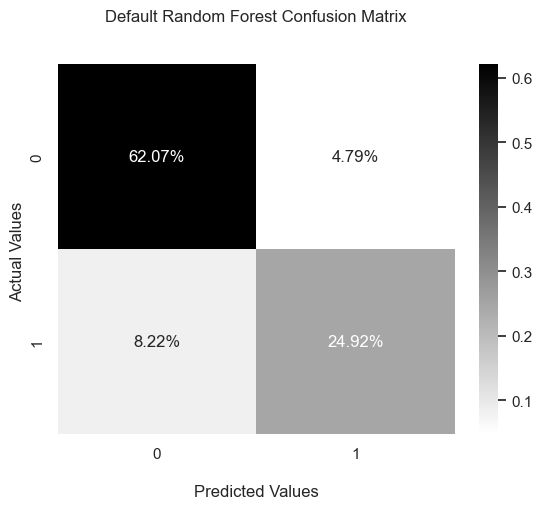

In [37]:

#evaluation of Default Random Forest: metrics pivot chart
print(classification_report(y_test, y_pred_rf))

print('Accuracy Score : ' + str(round(default_rf_accuracy,3)))
print('Precision Score : ' + str(round(default_rf_precision,3)))
print('Recall Score : ' + str(round(default_rf_recall,3)))
print('F-Score : ' + str(round(default_rf_f1,3)))

cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default Random Forest Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Default Logistic Regression

In [38]:
lr = LogisticRegression(random_state = 42)
# Create Logistic Regression model
lr.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_lr = lr.predict(X_test)

default_lr_accuracy = accuracy_score(y_test, y_pred_lr)
default_lr_precision = precision_score(y_test, y_pred_lr)
default_lr_recall = recall_score(y_test, y_pred_lr)
default_lr_f1 = f1_score(y_test, y_pred_lr)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      7276
           1       0.71      0.59      0.64      3607

    accuracy                           0.78     10883
   macro avg       0.76      0.73      0.74     10883
weighted avg       0.78      0.78      0.78     10883

Accuracy Score : 0.785
Precision Score : 0.713
Recall Score : 0.586
F-Score : 0.643


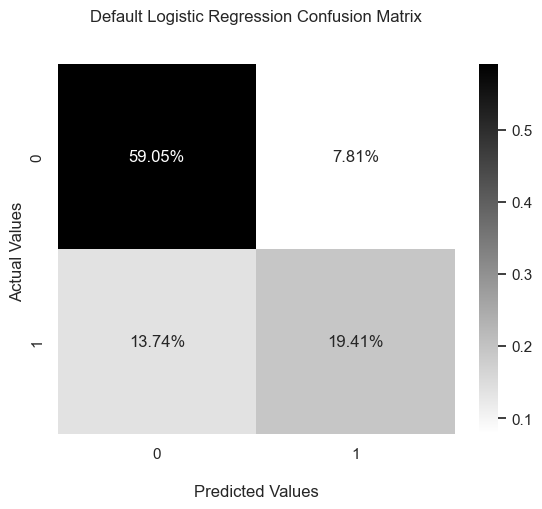

In [39]:
print(classification_report(y_test, y_pred_lr))

print('Accuracy Score : ' + str(round(default_lr_accuracy,3)))
print('Precision Score : ' + str(round(default_lr_precision,3)))
print('Recall Score : ' + str(round(default_lr_recall,3)))
print('F-Score : ' + str(round(default_lr_f1,3)))

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default Logistic Regression Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Default SVM(SVC)

In [40]:
svm = SVC(random_state = 42)
# Create SVM model
svm.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_svm = svm.predict(X_test)

default_svm_accuracy = accuracy_score(y_test, y_pred_svm)
default_svm_precision = precision_score(y_test, y_pred_svm)
default_svm_recall = recall_score(y_test, y_pred_svm)
default_svm_f1 = f1_score(y_test, y_pred_svm)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      7276
           1       0.74      0.48      0.58      3607

    accuracy                           0.77     10883
   macro avg       0.76      0.70      0.71     10883
weighted avg       0.77      0.77      0.76     10883

Accuracy Score : 0.771
Precision Score : 0.737
Recall Score : 0.481
F-Score : 0.582


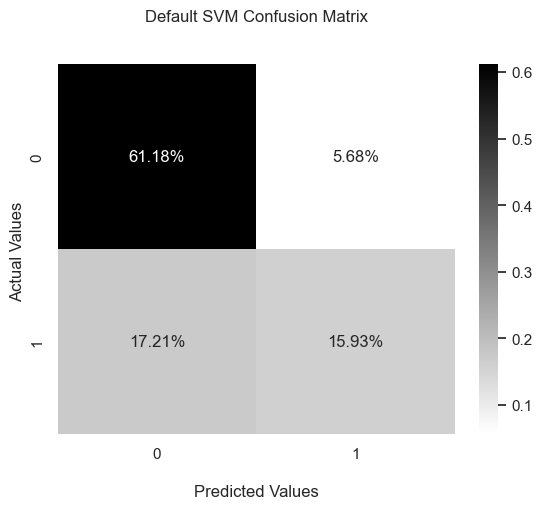

In [41]:
print(classification_report(y_test, y_pred_svm))

print('Accuracy Score : ' + str(round(default_svm_accuracy,3)))
print('Precision Score : ' + str(round(default_svm_precision,3)))
print('Recall Score : ' + str(round(default_svm_recall,3)))
print('F-Score : ' + str(round(default_svm_f1,3)))

cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
ax = sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default SVM Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Default K-Nearest Neighbors

In [42]:
knn = KNeighborsClassifier()
# Create Default K-Nearest Neighbors model
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)

#evaluation
default_knn_accuracy = accuracy_score(y_test, y_pred_knn)
default_knn_precision = precision_score(y_test, y_pred_knn)
default_knn_recall = recall_score(y_test, y_pred_knn)
default_knn_f1 = f1_score(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      7276
           1       0.77      0.68      0.73      3607

    accuracy                           0.83     10883
   macro avg       0.81      0.79      0.80     10883
weighted avg       0.83      0.83      0.83     10883

Accuracy Score : 0.829
Precision Score : 0.774
Recall Score : 0.682
F-Score : 0.725


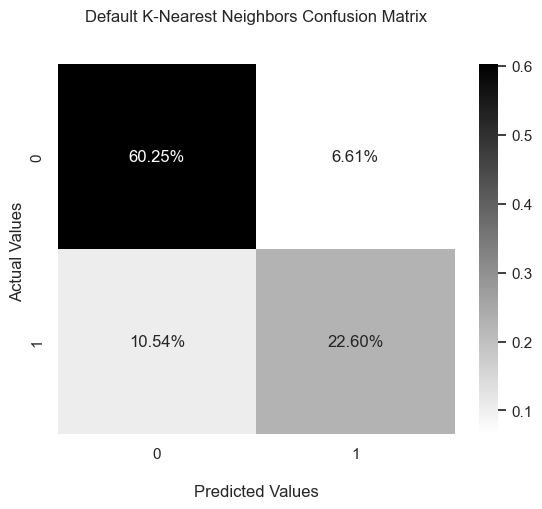

In [43]:
print(classification_report(y_test, y_pred_knn))

print('Accuracy Score : ' + str(round(default_knn_accuracy,3)))
print('Precision Score : ' + str(round(default_knn_precision,3)))
print('Recall Score : ' + str(round(default_knn_recall,3)))
print('F-Score : ' + str(round(default_knn_f1,3)))

cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
ax = sns.heatmap(cf_matrix_knn/np.sum(cf_matrix_knn), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default K-Nearest Neighbors Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Default Decision Tree

In [44]:
dt = DecisionTreeClassifier(random_state = 0)
# Create Default Decision Tree model
dt.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

#evaluation
default_dt_accuracy = accuracy_score(y_test, y_pred_dt)
default_dt_precision = precision_score(y_test, y_pred_dt)
default_dt_recall = recall_score(y_test, y_pred_dt)
default_dt_f1 = f1_score(y_test, y_pred_dt)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7276
           1       0.75      0.76      0.76      3607

    accuracy                           0.84     10883
   macro avg       0.82      0.82      0.82     10883
weighted avg       0.84      0.84      0.84     10883

Accuracy Score : 0.839
Precision Score : 0.755
Recall Score : 0.762
F-Score : 0.758


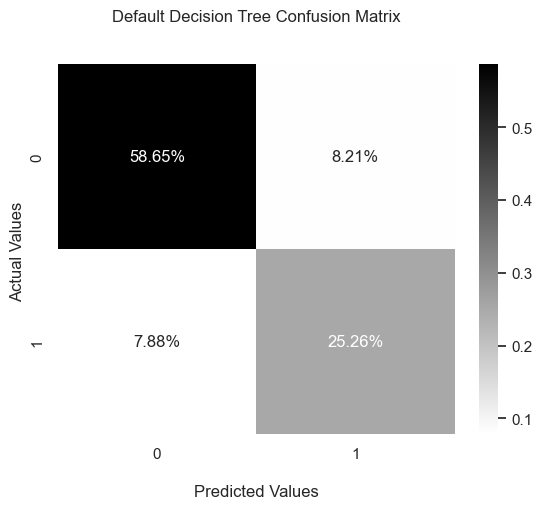

In [45]:
print(classification_report(y_test, y_pred_dt))

print('Accuracy Score : ' + str(round(default_dt_accuracy,3)))
print('Precision Score : ' + str(round(default_dt_precision,3)))
print('Recall Score : ' + str(round(default_dt_recall,3)))
print('F-Score : ' + str(round(default_dt_f1,3)))

cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
ax = sns.heatmap(cf_matrix_dt/np.sum(cf_matrix_dt), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default Decision Tree Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Results evaluation

In [47]:
accuracies = {"Default Logistic Regression": default_lr_accuracy, 
              "Default SVM": default_svm_accuracy, 
              "Default KNN": default_knn_accuracy, 
              "Default Decision Tree": default_dt_accuracy, 
              "Default Random Forest": default_rf_accuracy, 
              }

precisions = {"Default Logistic Regression": default_lr_precision, 
              "Default SVM": default_svm_precision, 
              "Default KNN": default_knn_precision, 
              "Default Decision Tree": default_dt_precision, 
              "Default Random Forest": default_rf_precision, 
              }

recalls = {"Default Logistic Regression": default_lr_recall, 
           "Default SVM": default_svm_recall, 
           "Default KNN": default_knn_recall,  
           "Default Decision Tree": default_dt_recall, 
           "Default Random Forest": default_rf_recall, 
           }

f1_scores = {"Default Logistic Regression": default_lr_f1, 
             "Default SVM": default_svm_f1, 
             "Default KNN": default_knn_f1,  
             "Default Decision Tree": default_dt_f1, 
             "Default Random Forest": default_rf_f1, 
             }

In [48]:
models_keys             = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())
#precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
recall_models_values    = list(recalls.values())
f1_score_models_values  = list(f1_scores.values())

df_models = pd.DataFrame({"Model":models_keys,
                          "Accuracy":accuracy_models_values,
                          "Precision": precision_models_values,
                          "Recall": recall_models_values,
                          "F1_Score": f1_score_models_values})
print(df_models)

                         Model  Accuracy  Precision    Recall  F1_Score
0  Default Logistic Regression  0.784526   0.713032  0.585528  0.643020
1                  Default SVM  0.771111   0.737245  0.480732  0.581977
2                  Default KNN  0.828540   0.773828  0.682007  0.725022
3        Default Decision Tree  0.839107   0.754805  0.762129  0.758449
4        Default Random Forest  0.869889   0.838849  0.751871  0.792982


In [49]:
#preparation for plotting the metrics
accuracy_models_keys    = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())

df_accuracy             = pd.DataFrame({"Model":accuracy_models_keys,
                                        "Accuracy":accuracy_models_values})

precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
df_precision            = pd.DataFrame({"Model": precision_models_keys,
                                        "Precision": precision_models_values})

recall_models_keys      = list(recalls.keys())
recall_models_values    = list(recalls.values())
df_recall               = pd.DataFrame({"Model": recall_models_keys,
                                        "Recall": recall_models_values})

f1_score_models_keys    = list(f1_scores.keys())
f1_score_models_values  = list(f1_scores.values())
df_f1_score             = pd.DataFrame({"Model": f1_score_models_keys,
                                        "F1_score": f1_score_models_values})


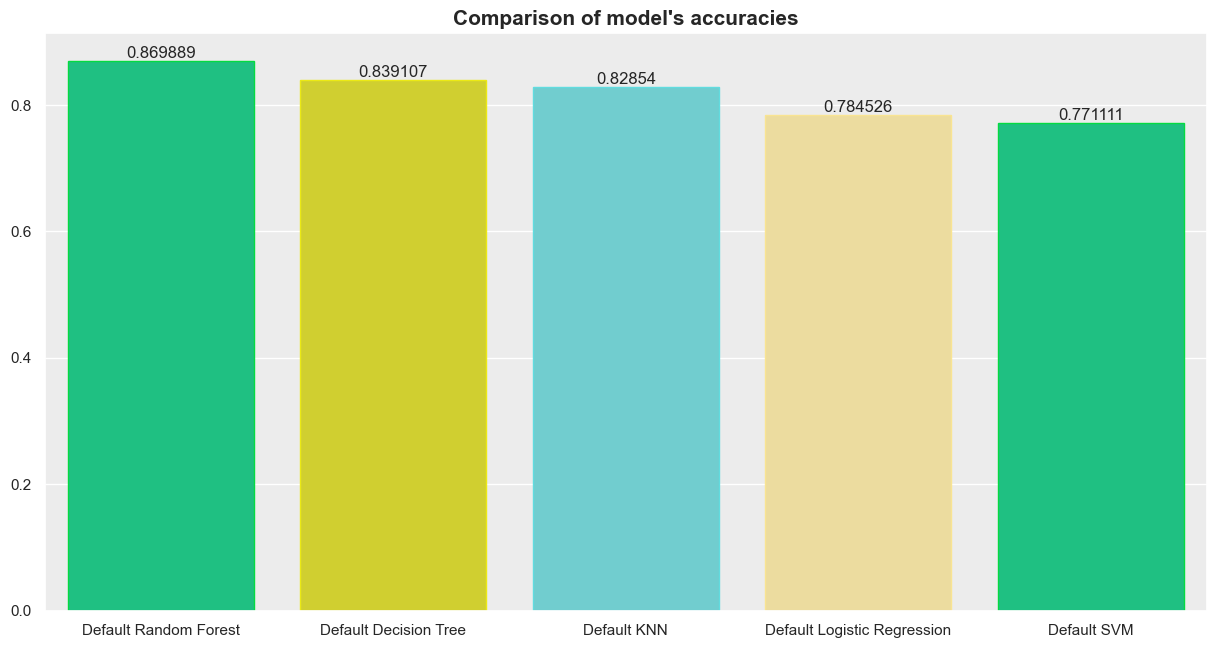

In [50]:
olympic_medals_palette = ['#04DB88','#EBE915', '#61DCDF', '#F9E492']
olympic_medals_edge_colors = ['#04DB41','#EBE915', '#61DCDF', '#F9E492']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_accuracy.sort_values('Accuracy', ascending=False).Model)
plt.title(label = "Comparison of model's accuracies", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

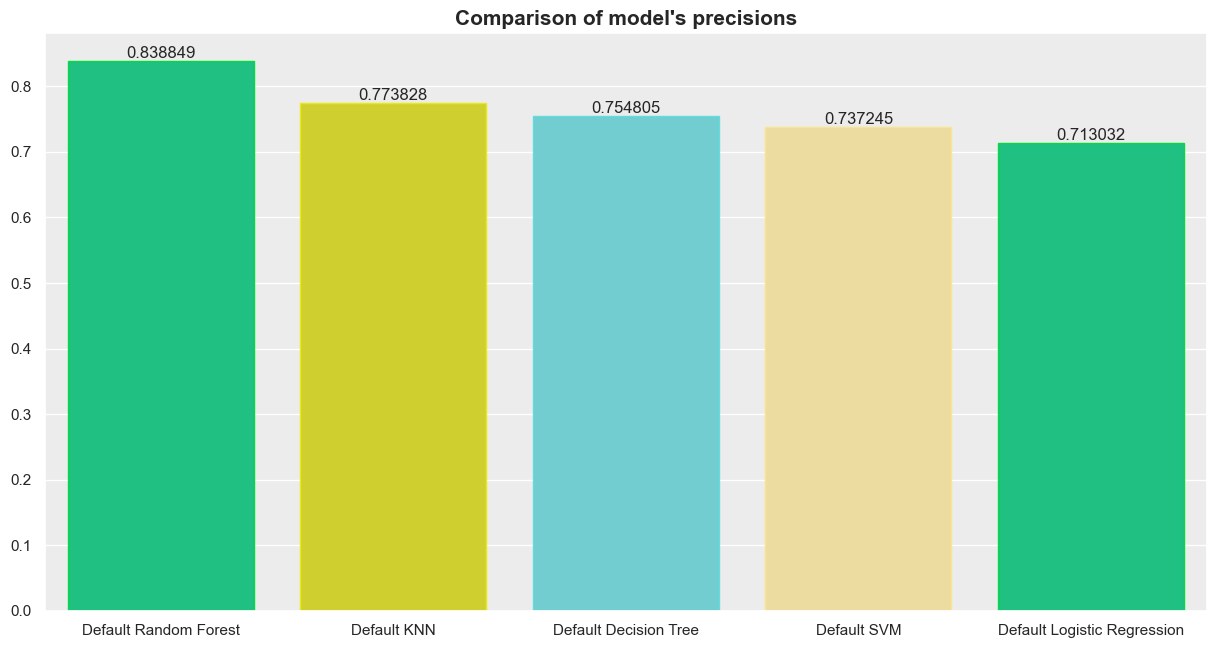

In [51]:
olympic_medals_palette = ['#04DB88','#EBE915', '#61DCDF', '#F9E492']
olympic_medals_edge_colors = ['#04DB41','#EBE915', '#61DCDF', '#F9E492']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(precisions.keys()), y = list(precisions.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_precision.sort_values("Precision", ascending=False).Model)
plt.title(label = "Comparison of model's precisions", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

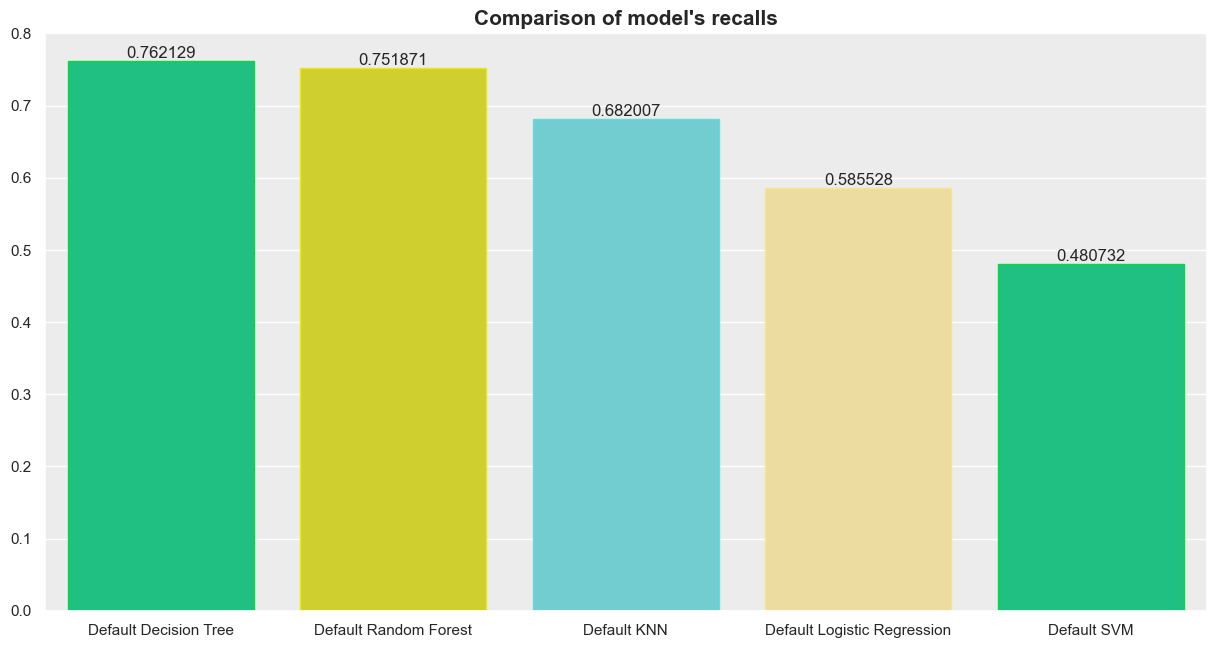

In [52]:
olympic_medals_palette = ['#04DB88','#EBE915', '#61DCDF', '#F9E492']
olympic_medals_edge_colors = ['#04DB41','#EBE915', '#61DCDF', '#F9E492']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(recalls.keys()), y = list(recalls.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_recall.sort_values("Recall", ascending=False).Model)
plt.title(label = "Comparison of model's recalls", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

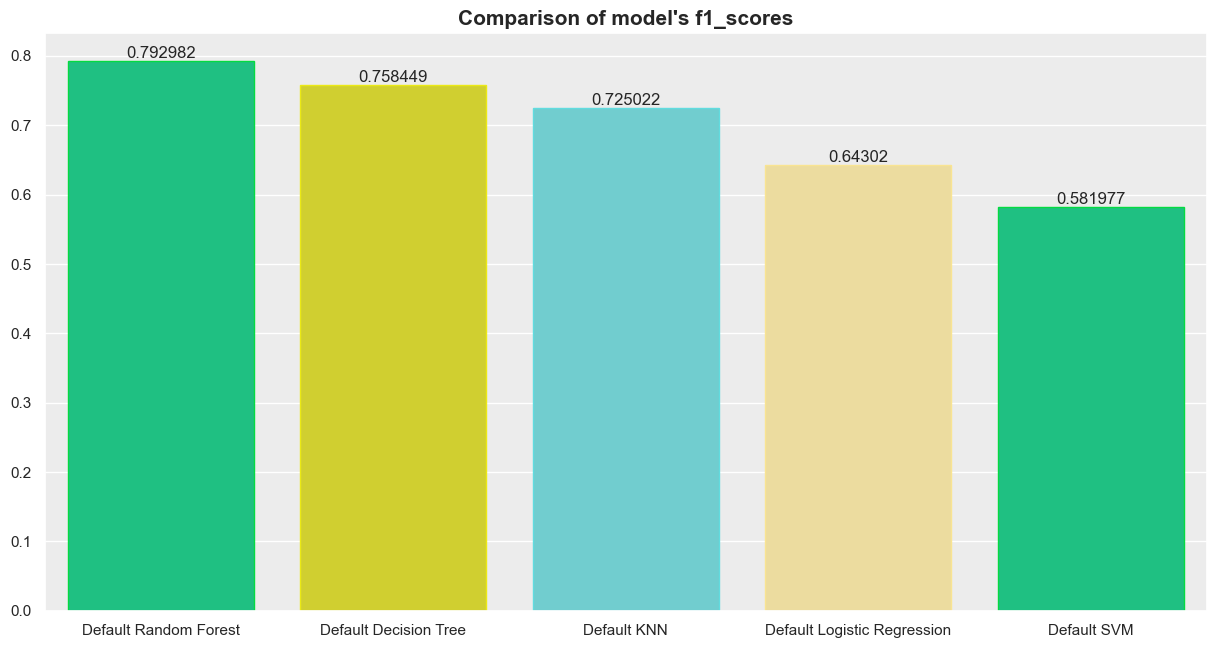

In [53]:
olympic_medals_palette = ['#04DB88','#EBE915', '#61DCDF', '#F9E492']
olympic_medals_edge_colors = ['#04DB41','#EBE915', '#61DCDF', '#F9E492']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(f1_scores.keys()), y = list(f1_scores.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_f1_score.sort_values("F1_score", ascending=False).Model)
plt.title(label = "Comparison of model's f1_scores", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

In [54]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)